**Author:** Nicholas Sager & Steven Cox   

In [22]:
knitr::opts_chunk$set(echo = FALSE, warning=FALSE, message=FALSE)

# Required Libraries
library(ggthemes)
library(tidyverse)
library(ggthemes)
library(usmap)
library(ggplot2)
library(caret)
library(e1071)
library(class)
library(usmapdata)

## Introduction

This case study is conducted to analyze data on a wide variety of American beers for Budweiser. It is our intention that the results provide an overall picture of the domestic beer market and help inform Budweiser's efforts in their future beer endeavors. The data set contains information on 2410 different beers from 558 different breweries in 50 different states.  It also contains information on the name of the beer, the name of the brewery, the state where the brewery is located, the alcohol by volume (ABV) of the beer, the International Bitterness Units (IBU) of the beer, and the style of the beer. We will predominately be focusing on the ABV and IBU of the beer, as well as the style of the beer.

For an interactive app to visualize this data, please see: [Shiny App](https://nicksager.shinyapps.io/CaseStudy1/)

## Read the Data

First, we will read in the beers data, and merge the breweries data so that each beer has brewery data associated with it. Then we will view a few rows to make sure it looks ok. 

In [2]:
beers <- read.csv("Data/Beers.csv")
breweries <- read.csv("Data/Breweries.csv")

# Verify same levels for merging with Brewery ID
str(as.factor(beers$Brewery_id))
str(as.factor(breweries$Brew_ID))

# Merge the beers and breweries data sets
beers_breweries <- left_join(beers, breweries, by = c("Brewery_id" = "Brew_ID")) %>%
    rename(Beer_Name = Name.x, Brewery = Name.y)

# Verify data frame
head(beers_breweries)
str(beers_breweries)

 Factor w/ 558 levels "1","2","3","4",..: 409 178 178 178 178 178 178 178 178 178 ...
 Factor w/ 558 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


,Beer_Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces,Brewery,City,State
,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,Pub Beer,1436,0.050,NA,409,American Pale Lager,12,10 Barrel Brewing Company,Bend,OR
2,Devil's Cup,2265,0.066,NA,178,American Pale Ale (APA),12,18th Street Brewery,Gary,IN
3,Rise of the Phoenix,2264,0.071,NA,178,American IPA,12,18th Street Brewery,Gary,IN
4,Sinister,2263,0.090,NA,178,American Double / Imperial IPA,12,18th Street Brewery,Gary,IN
5,Sex and Candy,2262,0.075,NA,178,American IPA,12,18th Street Brewery,Gary,IN
6,Black Exodus,2261,0.077,NA,178,Oatmeal Stout,12,18th Street Brewery,Gary,IN


'data.frame':	2410 obs. of  10 variables:
 $ Beer_Name : chr  "Pub Beer" "Devil's Cup" "Rise of the Phoenix" "Sinister" ...
 $ Beer_ID   : int  1436 2265 2264 2263 2262 2261 2260 2259 2258 2131 ...
 $ ABV       : num  0.05 0.066 0.071 0.09 0.075 0.077 0.045 0.065 0.055 0.086 ...
 $ IBU       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Brewery_id: int  409 178 178 178 178 178 178 178 178 178 ...
 $ Style     : chr  "American Pale Lager" "American Pale Ale (APA)" "American IPA" "American Double / Imperial IPA" ...
 $ Ounces    : num  12 12 12 12 12 12 12 12 12 12 ...
 $ Brewery   : chr  "10 Barrel Brewing Company" "18th Street Brewery" "18th Street Brewery" "18th Street Brewery" ...
 $ City      : chr  "Bend" "Gary" "Gary" "Gary" ...
 $ State     : chr  " OR" " IN" " IN" " IN" ...


This looks like data we can work with. 

## Data Exploration
Next, we will start exploring the data for insights into the American beer market.

### 1. How many breweries are present in each state?

First we will investigate the distribution of breweries by state.

In [3]:
beers_breweries %>%
    group_by(State) %>%
    summarize(count = n_distinct(Brewery)) %>%
    arrange(desc(count))

beers_breweries %>%
    group_by(State) %>%
    summarize(count = n_distinct(Brewery_id)) %>%
    arrange(desc(count))
#Need to figure out why those are different. 
#Check that the number of breweries match the number of brewery ids
n_distinct(beers_breweries$Brewery_id)
n_distinct(beers_breweries$Brewery)

State,count
<chr>,<int>
CO,46
CA,39
MI,32
OR,29
TX,28
PA,24
MA,23
WA,23
IN,22


State,count
<chr>,<int>
CO,47
CA,39
MI,32
OR,29
TX,28
PA,25
MA,23
WA,23
IN,22


[1] 558

[1] 551

Here, we can see that there are 558 brewery ids in the data set, but only 551 unique brewery names. This means that there are some breweries with multiple ids. We will need to investigate this further. 

The following code searches for brewery names that are in the data set more than once and combines their brewery id number.

In [4]:
#View abnormalities between Brewery Name and Brewery ID
unique(beers_breweries[c("Brewery", "Brewery_id")]) %>% 
  group_by(Brewery) %>% 
  filter(n() > 1) 

duplicate_IDs <- beers_breweries %>% 
  distinct(Brewery_id, .keep_all = TRUE) %>%  #get all the unique brewery_id
  group_by(Brewery) %>% filter(n() > 1) %>%   #group by name and filter for more than 1
  summarize(Brewery_id = paste(Brewery_id, collapse = "-")) #combine id's with a "-"

# loop through entire data set and if the brewery name is in the clean_breweries list
# then change the brewery id to the combined brewery id from above
i<-0
for (name in beers_breweries$Brewery) {
  i<-i+1
  if (name %in% duplicate_IDs$Brewery) {
    j = which(name == duplicate_IDs$Brewery)
    beers_breweries$Brewery_id[i] <- duplicate_IDs$Brewery_id[j]
  }
}
#Re-check that the number of breweries match the number of brewery ids
n_distinct(beers_breweries$Brewery) == n_distinct(beers_breweries$Brewery_id)

Brewery,Brewery_id
<chr>,<int>
Blackrocks Brewery,96
Blackrocks Brewery,13
Blue Mountain Brewery,383
Blue Mountain Brewery,415
Lucette Brewing Company,378
Lucette Brewing Company,457
Oskar Blues Brewery,167
Oskar Blues Brewery,504
Otter Creek Brewing,276


[1] TRUE

It's a small change, but will make any analysis we do of state or brewery aggregates more accurate.

Now we can address the question at hand: how many breweries are in each state?

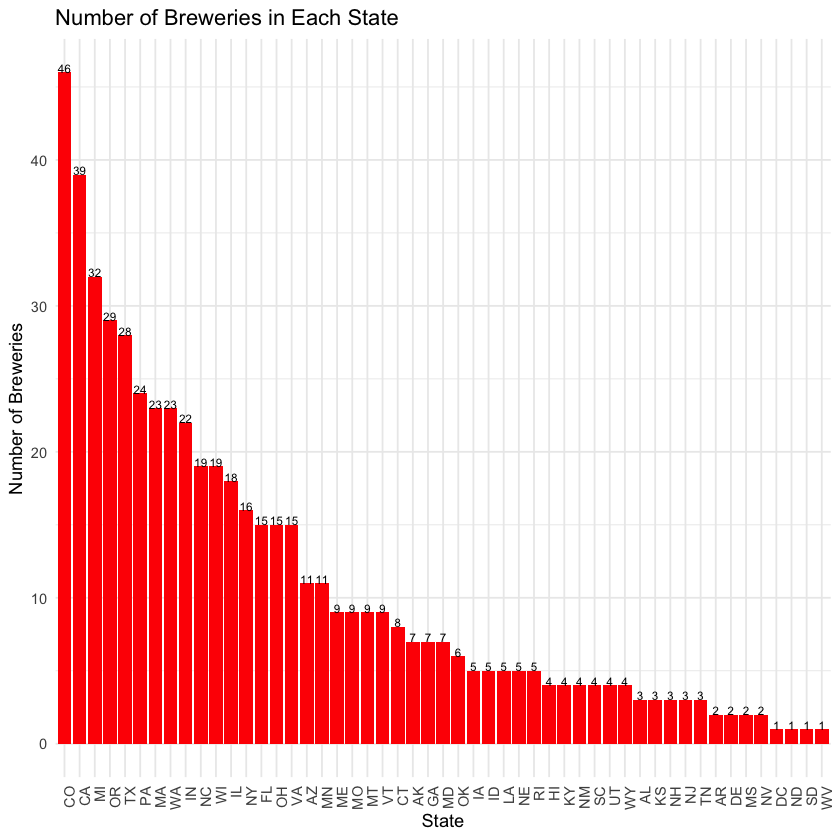

In [5]:
# Plot the number of breweries in each state
## Noticed extra spaces in State abbr
beers_breweries$State <- str_replace_all(beers_breweries$State," ","")

# Setup Stat for graphs
Brewery_Stat = beers_breweries %>%
  group_by(State) %>%
  summarize(count = n_distinct(Brewery)) %>%
  arrange(desc(count)) 

# Basic Bar plot
ggplot(Brewery_Stat, aes(x = reorder(State, -count), y = count)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(x = "State", y = "Number of Breweries", title = "Number of Breweries in Each State") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_text(aes(label = count), vjust = 0, size = 2.5)

Here is a heat map of the amount of breweries per state.

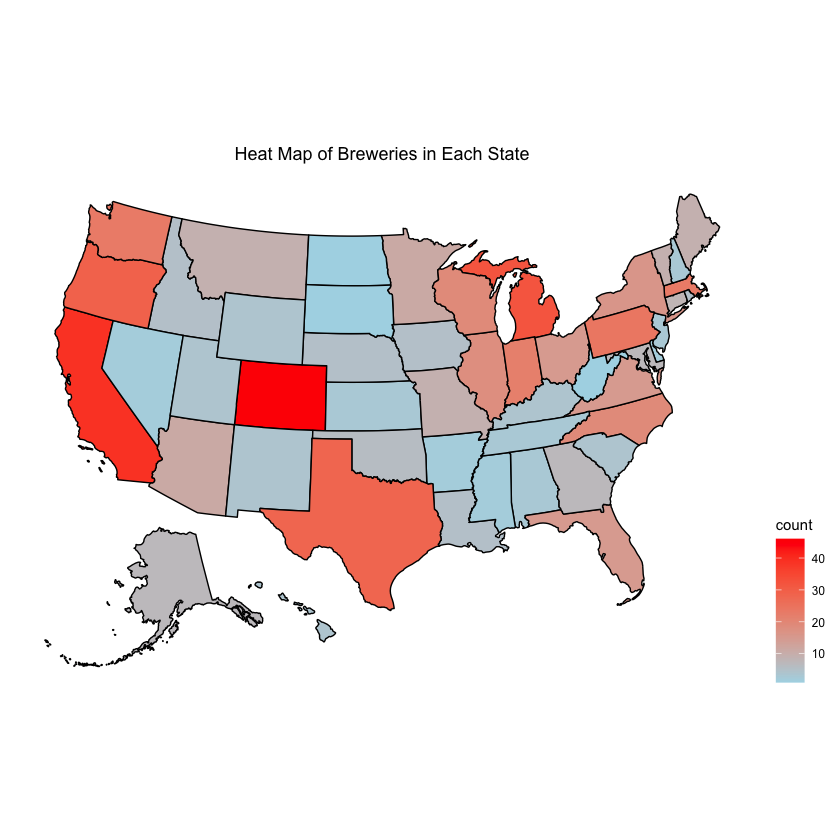

In [6]:
# Heatmap of with the count over US map
state_fips <- statepop %>% select(fips, abbr, full) # get fips values for heatmap plot

Brewery_Stat <- left_join(Brewery_Stat, state_fips, by = c("State"= "abbr"))

plot_usmap(data = Brewery_Stat, values = "count") + 
  labs(title = "Heat Map of Breweries in Each State", ylabel = count) + 
  theme(plot.title = element_text(hjust = 0.5), legend.position = "right") +
  scale_fill_gradient('count',  low = "lightblue", high = "red")

Colorado has the most breweries of any state. Visually, the west coast, the Midwest, Colorado, and Texas have the highest amount of breweries. This may reflect the popularity of beer in those regions which could be significant for marketing efforts.

In [7]:
# Top and Bottom 10 
Brewery_Stat %>% select(full,count) %>% head(.,10)
Brewery_Stat %>% select(full,count) %>% tail(.,10)

full,count
<chr>,<int>
Colorado,46
California,39
Michigan,32
Oregon,29
Texas,28
Pennsylvania,24
Massachusetts,23
Washington,23
Indiana,22


full,count
<chr>,<int>
New Jersey,3
Tennessee,3
Arkansas,2
Delaware,2
Mississippi,2
Nevada,2
District of Columbia,1
North Dakota,1
South Dakota,1


### 2. Merge the datasets and print the first 6 and last 6.

The data sets have been merged using the following R code:
```
  beers_breweries <- left_join(beers, breweries, by = c("Brewery_id" = "Brew_ID")) %>%
    rename(Beer_Name = Name.x, Brewery = Name.y)
```
Here is a sample of the data to verify that the merge was successful:

In [8]:
head(beers_breweries, 6)
tail(beers_breweries, 6)

,Beer_Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces,Brewery,City,State
,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,Pub Beer,1436,0.050,NA,409,American Pale Lager,12,10 Barrel Brewing Company,Bend,OR
2,Devil's Cup,2265,0.066,NA,178,American Pale Ale (APA),12,18th Street Brewery,Gary,IN
3,Rise of the Phoenix,2264,0.071,NA,178,American IPA,12,18th Street Brewery,Gary,IN
4,Sinister,2263,0.090,NA,178,American Double / Imperial IPA,12,18th Street Brewery,Gary,IN
5,Sex and Candy,2262,0.075,NA,178,American IPA,12,18th Street Brewery,Gary,IN
6,Black Exodus,2261,0.077,NA,178,Oatmeal Stout,12,18th Street Brewery,Gary,IN


,Beer_Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces,Brewery,City,State
,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
2405,Rocky Mountain Oyster Stout,1035,0.075,NA,425,American Stout,12,Wynkoop Brewing Company,Denver,CO
2406,Belgorado,928,0.067,45,425,Belgian IPA,12,Wynkoop Brewing Company,Denver,CO
2407,Rail Yard Ale,807,0.052,NA,425,American Amber / Red Ale,12,Wynkoop Brewing Company,Denver,CO
2408,B3K Black Lager,620,0.055,NA,425,Schwarzbier,12,Wynkoop Brewing Company,Denver,CO
2409,Silverback Pale Ale,145,0.055,40,425,American Pale Ale (APA),12,Wynkoop Brewing Company,Denver,CO
2410,Rail Yard Ale (2009),84,0.052,NA,425,American Amber / Red Ale,12,Wynkoop Brewing Company,Denver,CO


### 3. Address the missing values in each column.

There are some missing data in the beers dataset. We will need to address these before we can do any analysis. Each variable has the following number of missing values:

In [9]:
# Investigate the missing values
print(sapply(beers_breweries, function(x) sum(is.na(x))))
print(str(beers_breweries))

 Beer_Name    Beer_ID        ABV        IBU Brewery_id      Style     Ounces 
         0          0         62       1005          0          0          0 
   Brewery       City      State 
         0          0          0 
'data.frame':	2410 obs. of  10 variables:
 $ Beer_Name : chr  "Pub Beer" "Devil's Cup" "Rise of the Phoenix" "Sinister" ...
 $ Beer_ID   : int  1436 2265 2264 2263 2262 2261 2260 2259 2258 2131 ...
 $ ABV       : num  0.05 0.066 0.071 0.09 0.075 0.077 0.045 0.065 0.055 0.086 ...
 $ IBU       : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Brewery_id: chr  "409" "178" "178" "178" ...
 $ Style     : chr  "American Pale Lager" "American Pale Ale (APA)" "American IPA" "American Double / Imperial IPA" ...
 $ Ounces    : num  12 12 12 12 12 12 12 12 12 12 ...
 $ Brewery   : chr  "10 Barrel Brewing Company" "18th Street Brewery" "18th Street Brewery" "18th Street Brewery" ...
 $ City      : chr  "Bend" "Gary" "Gary" "Gary" ...
 $ State     : chr  "OR" "IN" "IN" "IN" ...
NULL


There are 62 missing ABV values, 1005, missing IBU values, and 5 missing beer Style values, which are not reflected in the output above.

There are few enough missing ABV values to be filled in manually using the following code. Values were obtained from websites like BeerAdvocate and Untappd.

In [10]:
# writing missing ABV values to csv file
missing_ABV <- beers_breweries %>% select(Beer_ID,Beer_Name,ABV,IBU,Brewery) %>%
    filter(is.na(ABV))
write.csv(missing_ABV, "Data/missingABV.csv", row.names=TRUE) # Create CSV to fill out
missing_ABV <- read.csv("Data/missingABV_filled.csv", header = TRUE) # Read in filled CSV

missing_ABV <- missing_ABV %>% select(Beer_ID,ABV,IBU)
beers_breweries <- left_join(beers_breweries, missing_ABV, by = c("Beer_ID")) %>%
      rename(ABV = ABV.x, IBU = IBU.x)

beers_breweries <- beers_breweries %>% mutate(ABV = ifelse(is.na(ABV), ABV.y, ABV ), ABV) #bring over new ABV's
beers_breweries <- beers_breweries %>% mutate(IBU = ifelse(is.na(IBU), IBU.y, IBU ), IBU) # bring over new IBUs

#Remove ABV.y and IBU.y
beers_breweries$ABV.y <- NULL
beers_breweries$IBU.y <- NULL

#Discovered 2 Beer_Names that are not beers, but other products of the brewery - We may want to delete
#CAN'D AID Foundation Beer ID 1790
beers_breweries <- beers_breweries[beers_breweries$Beer_ID != 1790,]
#Crowler Beer ID 1796
beers_breweries <- beers_breweries[beers_breweries$Beer_ID != 1796,]

#Verify reduction in missing values
sapply(beers_breweries, function(x) sum(is.na(x)))

Beer_Name    Beer_ID        ABV        IBU Brewery_id      Style     Ounces 
         0          0         13        978          0          0          0 
   Brewery       City      State 
         0          0          0

The remaining missing values will be imputed using the mean IBU values for the style of beer. IBU values appear to be missing at random. The amount differs by style of beer, but we have no reason to believe it differs base on the actual value of IBU. American IPA's have the highest number of missing IBU values but, as we will see later, the have a unique range of IBU values, so the imputation should be accurate. The same applies to the other Ales that make up the bulk of the missing data, and imputation is appropriate in general because the data appears missing at random. Because our analysis is concerned with Ales, more effort could be put into finding these missing values if more time or money becomes available and a more accurate analysis is desired.

# A tibble: 100 × 10
   Style     Beer_Name Beer_ID   ABV   IBU Brewery_id Ounces Brewery  City State
   <chr>         <int>   <int> <int> <int>      <int>  <int>   <int> <int> <int>
 1 American…         0       0     1   118          0      0       0     0     0
 2 American…         0       0     0    90          0      0       0     0     0
 3 American…         0       0     2    52          0      0       0     0     0
 4 American…         0       0     1    45          0      0       0     0     0
 5 Cider             0       0     0    37          0      0       0     0     0
 6 American…         0       0     1    35          0      0       0     0     0
 7 American…         0       0     0    31          0      0       0     0     0
 8 Saison /…         0       0     0    29          0      0       0     0     0
 9 American…         0       0     0    28          0      0       0     0     0
10 American…         0       0     2    28          0      0       0     0     0
# ℹ 90 

Beer_Name    Beer_ID        ABV        IBU Brewery_id      Style     Ounces 
         0          0         13         52          0          0          0 
   Brewery       City      State 
         0          0          0

# A tibble: 100 × 2
   Style                    IBU
   <chr>                  <int>
 1 "Cider"                   37
 2 "Mead"                     5
 3 "Shandy"                   3
 4 "Rauchbier"                2
 5 "American Malt Liquor"     1
 6 "Braggot"                  1
 7 "Flanders Red Ale"         1
 8 "Kristalweizen"            1
 9 "Low Alcohol Beer"         1
10 ""                         0
# ℹ 90 more rows


Beer_Name    Beer_ID        ABV        IBU Brewery_id      Style     Ounces 
         0          0          0          0          0          0          0 
   Brewery       City      State 
         0          0          0

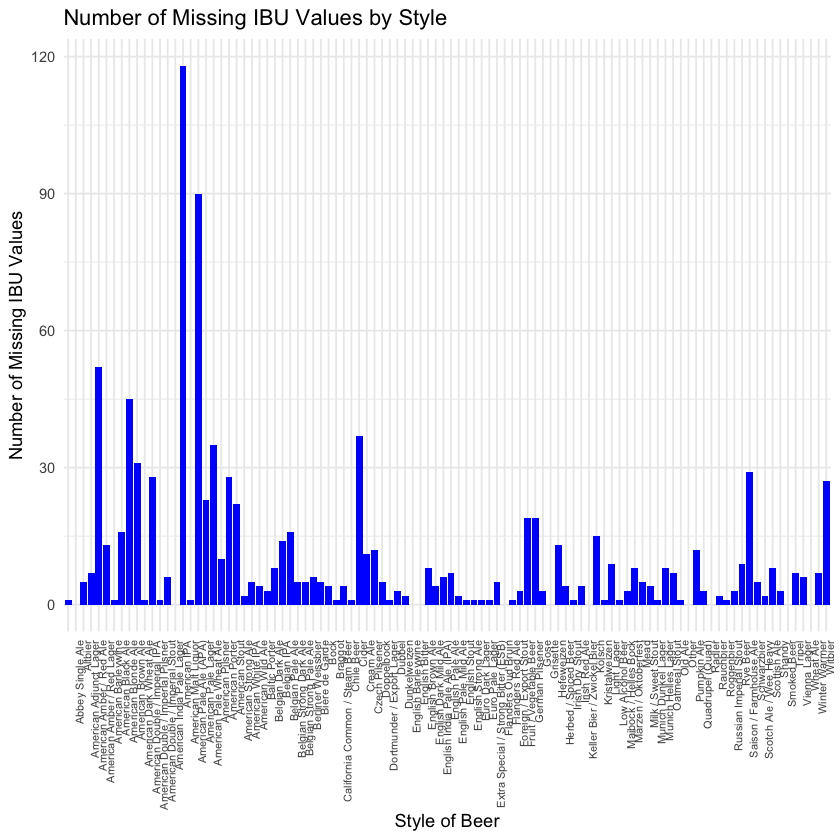

In [11]:
# Missing IBU values grouped by style of beer
beers_breweries %>% 
  group_by(Style) %>%
  summarize_all(~ sum(is.na(.))) %>%
  arrange(desc(IBU)) %>%
  print()

# Plot a histogram of the missing IBU values by style of beer
beers_breweries %>%
  group_by(Style) %>%
  summarize_all(~ sum(is.na(.))) %>%
  arrange(desc(IBU)) %>%
  ggplot(aes(x = Style, y = IBU)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = "Style of Beer", y = "Number of Missing IBU Values", 
         title = "Number of Missing IBU Values by Style") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = rel(0.75), angle = 90, hjust = 1))

#Impute the values for the missing IBU values with the mean IBU value for the style of beer
beers_breweries <- beers_breweries %>%
    group_by(Style) %>%
    mutate(IBU = ifelse(is.na(IBU), mean(IBU, na.rm = TRUE), IBU))

## Note - Still have 52 missing IBUs after this method of handling the NAs, 
sapply(beers_breweries, function(x) sum(is.na(x)))
## Show remaining missing IBU values, insignificant to our modeling
beers_breweries %>% select(Style,IBU) %>% 
  group_by(Style) %>%
  summarize_all(~ sum(is.na(.))) %>%
  arrange(desc(IBU)) %>%
  print(n = 10)

# Removing the remaining missing values 
beers_breweries <- beers_breweries %>% drop_na(ABV, IBU)
sapply(beers_breweries, function(x) sum(is.na(x)))

There are still 52 missing IBU values after imputing the mean IBU value for the style of beer. These beers are styles that do not commonly have IBU measured, and so there is no mean to impute. As shown in the table of remaining missing values per style, these beers are largely styles that are irrelevant to our analysis. We will remove those last few missing IBUs as they will be excluded in any further analysis.

Lastly, three beers do not have a style. Because this is such a small number of beers, we will change them to "Other" to make the analysis easier.

In [12]:
# Some Beers don't have a style, so we will change them to "Other"
beers_breweries %>% filter(Style == "")
beers_breweries[beers_breweries$Style == "", "Style"] = "Other"

Beer_Name,Beer_ID,ABV,IBU,Brewery_id,Style,Ounces,Brewery,City,State
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
Kilt Lifter Scottish-Style Ale,1635,0.060,21,161,,12,Four Peaks Brewing Company,Tempe,AZ
OktoberFiesta,2527,0.053,27,67,,12,Freetail Brewing Company,San Antonio,TX


### 4. Compute the median alcohol content and international bitterness unit for each state. Plot a bar chart to compare.

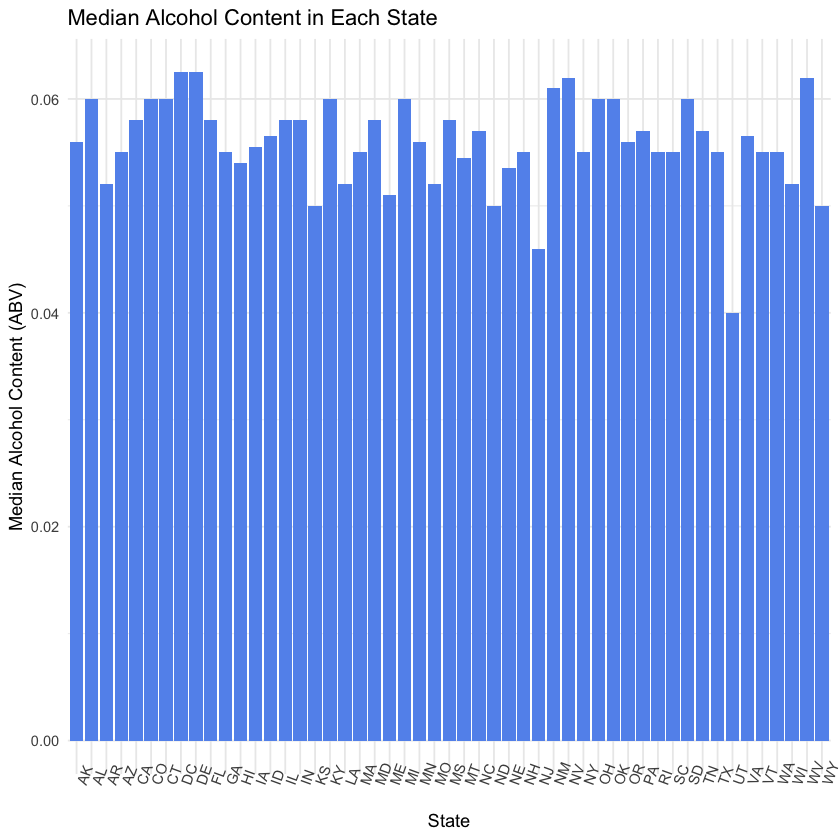

# A tibble: 51 × 3
   State median_ABV median_IBU
   <chr>      <dbl>      <dbl>
 1 DC        0.0625       27.9
 2 DE        0.0625       46  
 3 NV        0.062        40  
 4 WV        0.062        57.5
 5 NM        0.061        36.1
 6 AL        0.06         39.5
 7 CO        0.06         35.7
 8 CT        0.06         35.7
 9 KY        0.06         31.6
10 MI        0.06         29.7
# ℹ 41 more rows
# A tibble: 51 × 3
   State median_ABV median_IBU
   <chr>      <dbl>      <dbl>
 1 AK        0.056        33.8
 2 AL        0.06         39.5
 3 AR        0.052        35.7
 4 AZ        0.055        21.8
 5 CA        0.058        40  
 6 CO        0.06         35.7
 7 CT        0.06         35.7
 8 DC        0.0625       27.9
 9 DE        0.0625       46  
10 FL        0.058        35.7
11 GA        0.055        38.5
12 HI        0.054        25.5
13 IA        0.0555       25  
14 ID        0.0565       33.5
15 IL        0.058        41.2
16 IN        0.058        32.3
17 KS        0.

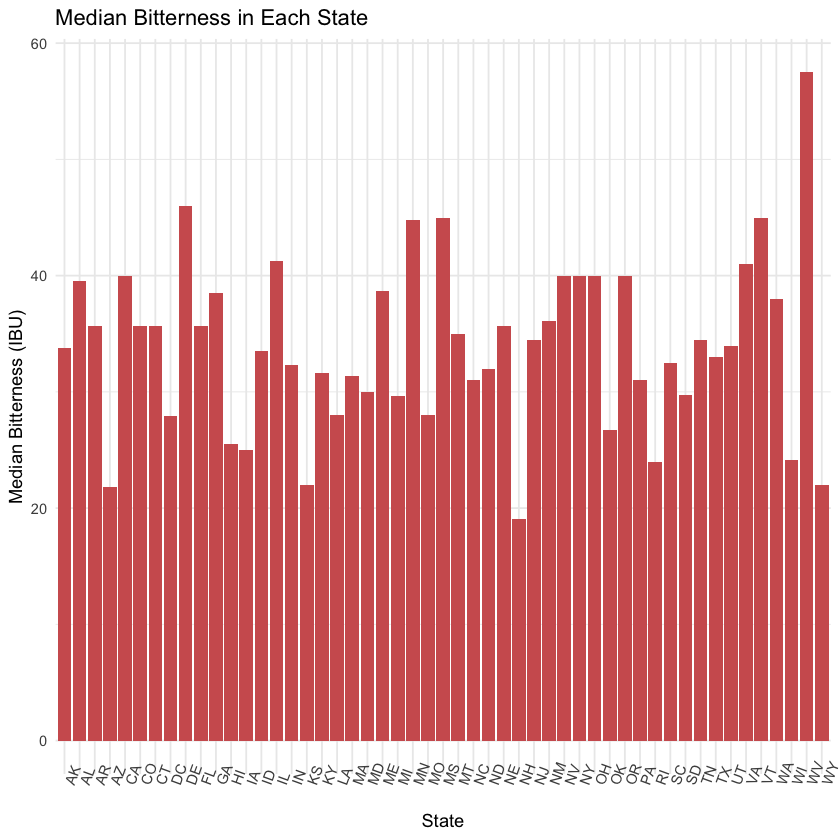

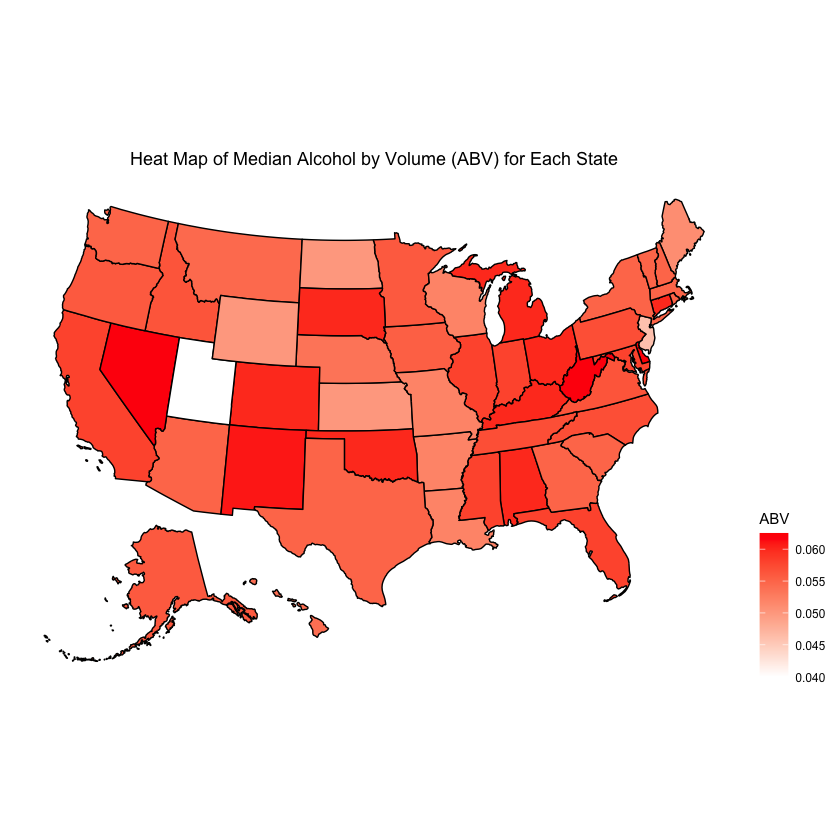

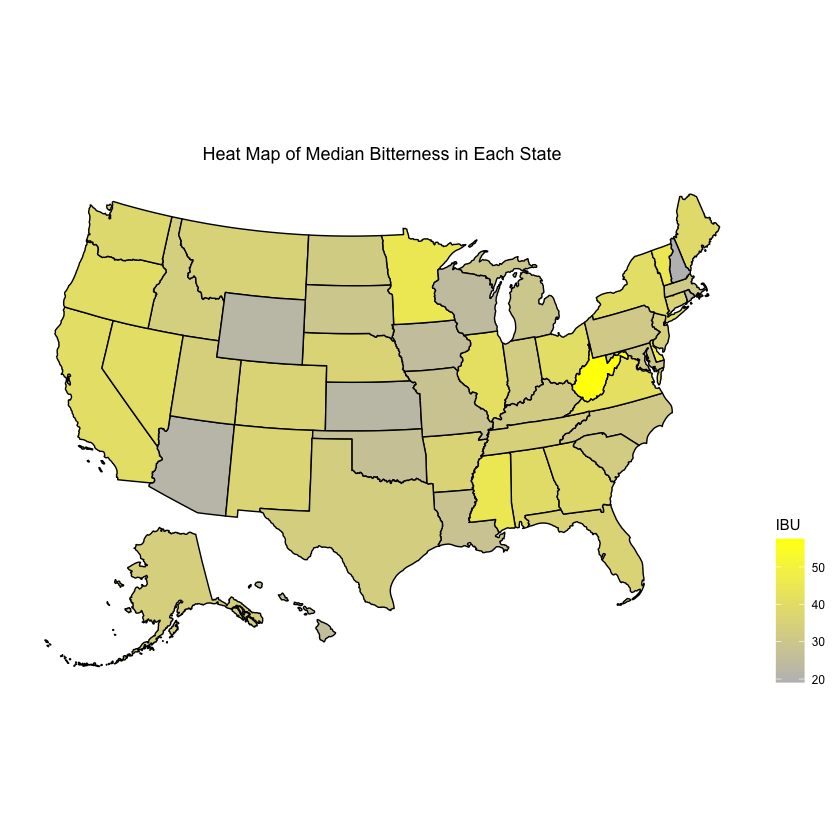

In [13]:
beers_medians <-
    beers_breweries %>%
    group_by(State) %>%
    summarize(median_ABV = median(ABV, na.rm = TRUE), 
              median_IBU = median(IBU, na.rm = TRUE), count = n()) %>%
    arrange(desc(median_ABV))

## Plot Median values by state
beers_medians %>%
    ggplot(aes(x = State, y = median_ABV)) +
    geom_bar(stat = "identity", fill = "cornflowerblue") +
    labs(x = "State", y = "Median Alcohol Content (ABV)", title = "Median Alcohol Content in Each State") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 70, hjust = 0))

beers_medians %>%
    ggplot(aes(x = State, y = median_IBU)) +
    geom_bar(stat = "identity", fill = "#d05e5e") +
    labs(x = "State", y = "Median Bitterness (IBU)", title = "Median Bitterness in Each State") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 70, hjust = 0))

#Print top 10 ABV medians
print(beers_medians[,1:3], n = 10)

#Print Medians
beers_medians <- beers_medians %>% arrange(State) 
print(beers_medians[,1:3], n = 50)


# Heatmap of with the medians over US map
beers_medians <- left_join(beers_medians, state_fips, by = c("State"= "abbr"))

plot_usmap(data = beers_medians, values = "median_ABV") + 
  labs(title = "Heat Map of Median Alcohol by Volume (ABV) for Each State") + 
  theme(plot.title = element_text(hjust = 0.5), legend.position = "right") +
  scale_fill_gradient('ABV',  low = "White", high = "Red")

plot_usmap(data = beers_medians, values = "median_IBU") + 
  labs(title = "Heat Map of Median Bitterness in Each State") + 
  theme(plot.title = element_text(hjust = 0.5), legend.position = "right") +
  scale_fill_gradient('IBU',  low = "grey", high = "Yellow")

There doesn't seem to be excessive variation in median IBU or ABV across states. The notable exception to this is the much lower median ABV for Utah, which may be an artifact of the state laws. ABV of all beer sold in Utah was previously limited to 3.2%. That law has been repealed and one of the authors, who lives in Utah, can confirm that the beer situation is slowly improving.

While at first glance, this data doesn't seem informative, there is potential for future research here. One can imagine that the medians could reflect regional preferences for beer. This analysis could be valuable for marketing products based on their profiles or designing products based on the region they will be sold in.

### 5. Which state has the maximum alcoholic (ABV) beer? Which state has the most bitter (IBU) beer?

In [14]:
beers_breweries %>%
    filter(ABV == max(beers_breweries$ABV, na.rm = TRUE)) %>%
    select(State, Beer_Name, ABV, Brewery, Style)

beers_breweries %>%
    filter(IBU == max(beers_breweries$IBU, na.rm = TRUE)) %>%
    select(State, Beer_Name, IBU, Brewery, Style)

State,Beer_Name,ABV,Brewery,Style
<chr>,<chr>,<dbl>,<chr>,<chr>
CO,Lee Hill Series Vol. 5 - Belgian Style Quadrupel Ale,0.128,Upslope Brewing Company,Quadrupel (Quad)


State,Beer_Name,IBU,Brewery,Style
<chr>,<chr>,<dbl>,<chr>,<chr>
OR,Bitter Bitch Imperial IPA,138,Astoria Brewing Company,American Double / Imperial IPA


The most alcoholic beer in the dataset is from Colorado. It is a Belgian Quadrupel and has 12.8% ABV. The most bitter beer is called "Bitter Bitch Imperial IPA", which is from Oregon and has 138 IBU.

### 6. Comment on the summary statistics and distribution of the ABV variable.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00700 0.05000 0.05600 0.05966 0.06700 0.12800 

Style,count,mean,sd,min,median,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abbey Single Ale,2,0.04900000,0.000000000,0.049,0.0490,0.049
Altbier,13,0.05438462,0.006898532,0.046,0.0520,0.072
American Adjunct Lager,18,0.04872222,0.004308754,0.039,0.0485,0.055
American Amber / Red Ale,131,0.05722061,0.008605023,0.035,0.0550,0.082
American Amber / Red Lager,28,0.04946429,0.004638663,0.040,0.0490,0.057
American Barleywine,3,0.09900000,0.000000000,0.099,0.0990,0.099
American Black Ale,36,0.06858333,0.012602437,0.050,0.0680,0.099
American Blonde Ale,107,0.04964486,0.004872434,0.035,0.0500,0.065
American Brown Ale,70,0.05772857,0.009636767,0.040,0.0550,0.095


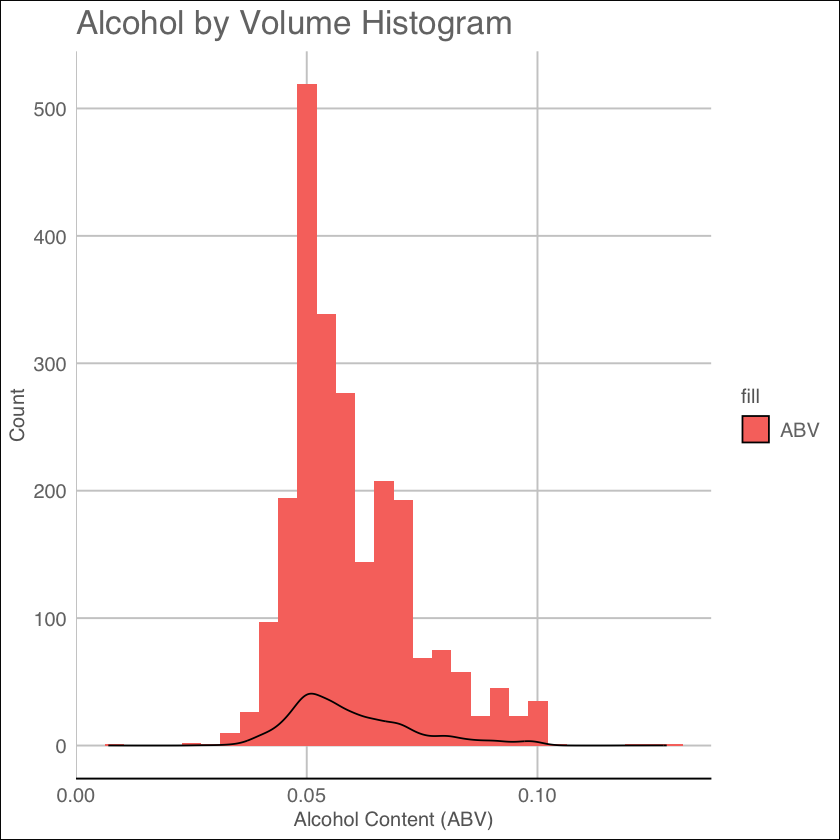

In [15]:
summary(beers_breweries$ABV, na.rm = TRUE)

beers_breweries %>% 
  group_by(Style) %>% 
  summarize(
    count = n(),
    mean = mean(ABV, na.rm = TRUE),
    sd = sd(ABV, na.rm = TRUE),
    min = min(ABV, na.rm = TRUE),
    median = median(ABV, na.rm = TRUE),
    max = max(ABV, na.rm = TRUE)
  )

beers_breweries %>% 
  ggplot(aes(x = ABV, fill = "ABV")) + 
  geom_histogram(show.legend = FALSE, bins=30) + geom_density() + 
  labs(x = "Alcohol Content (ABV)", y = "Count", 
       title = "Alcohol by Volume Histogram") +
  theme_gdocs()

# library(psych)
# describe(beers_breweries$ABV)

The mean ABV for beers in this data set is 5.97%, and the median is 5.6%. This is notable for being much higher than anything Budweiser is currently producing. There may be room for product line expansion in this direction based on market preferences.

### 7. Is there an apparent relationship between the bitterness of the beer and its alcoholic content? Draw a scatter plot.  Make your best judgment of a relationship and EXPLAIN your answer.

`geom_smooth()` using formula = 'y ~ x'


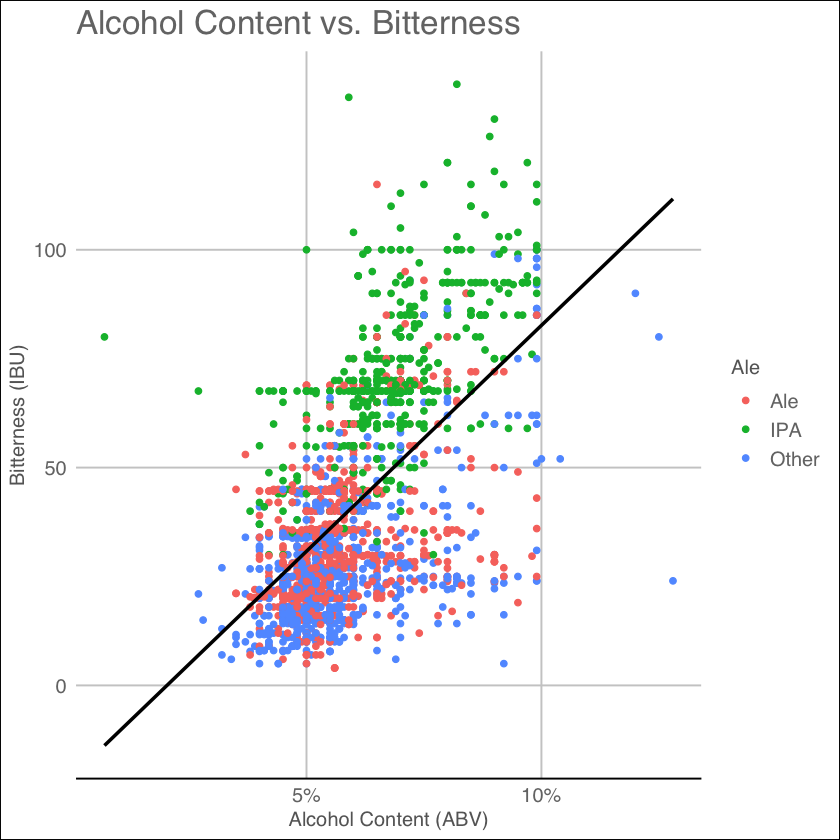

In [16]:
# Use string methods to make an indicator of whether the beer is an IPA or an Ale (Response variable)
beers_breweries$Ale <- ifelse(grepl("IPA", beers_breweries$Style, ignore.case = TRUE), "IPA",
                        ifelse(grepl("\\bAle\\b", beers_breweries$Style, ignore.case = TRUE), "Ale", "Other"))

beers_breweries %>% 
  ggplot(aes(x = ABV, y = IBU, color = Ale)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(x = "Alcohol Content (ABV)",
    y = "Bitterness (IBU)",
    title = "Alcohol Content vs. Bitterness") +
  scale_x_continuous(labels = scales::percent) +
  theme_gdocs()

 There appears to be a linear relationship between alcohol content (ABV) and bitterness (IBU), meaning that bitterness measured by IBU increases with alcohol content (ABV). The black line on the plot is a simple linear regression which attempts to estimate this relationship. The upward slope depicts that the relationship is positive. Note that the green colored dots above the line are IPAs, meaning that they have higher bitterness compared to their ABV. The blue dots below the line are mostly lagers, pilsners, and other light beers. These tend to be less bitter for a given ABV. The red dots are Ales, which tend to fall in between IPAs and the Other beers and roughly follow the regression line.

## Modelling

### 8. Ales vs. IPAs
Budweiser would also like to investigate the difference with respect to IBU and ABV between IPAs (India Pale Ales) and other types of Ale (any beer with “Ale” in its name other than IPA). To do so, we will use two strategies. First, we will use a simple machine learning model called a KNN (K-Nearest Neighbors) model to predict whether beers in the dataset are Ales or IPAs. The KNN model will look at the nearest beers to the ABV and IBU in question and classify the beer as an IPA or an Ale based on the majority of the surrounding beers. High accuracy in this model would indicate that there is a clear difference between IPAs and Ales. 

Next, we will use a statistical tool called a t-test to compare the ABV and IBU of IPAs and Ales. This is a more rigorous test that will evaluate whether the difference in ABV and IBU between the two beer Styles is statistically significant.

Here are the results of the KNN model:

In [17]:
set.seed(137)
# Use string methods to make an indicator of whether the beer is an IPA or an Ale (Response variable)
beers_breweries$Ale <- ifelse(grepl("IPA", beers_breweries$Style, ignore.case = TRUE), "IPA",
                        ifelse(grepl("\\bAle\\b", beers_breweries$Style, ignore.case = TRUE), "Ale", "Other"))

#Filter the data into a training set containing only (IPA or Ale)
ales <- beers_breweries %>%
    filter(Ale == "IPA" | Ale == "Ale")

# KNN done with only Ales
classifications = knn.cv(na.omit(ales)[, c("ABV", "IBU")], na.omit(ales)$Ale, k = 5)
confusionMatrix(table(classifications, na.omit(ales)$Ale))

# Use KNN to classify the beers into IPAs and Ales using ABV and IBU as the predictors
# The entire dataset is used to train the model, including "Other" beers
classifications = knn.cv(na.omit(beers_breweries)[, c("ABV", "IBU")], na.omit(beers_breweries)$Ale, k = 5)
confusionMatrix(table(classifications, na.omit(beers_breweries)$Ale))

Confusion Matrix and Statistics

               
classifications Ale IPA
            Ale 888  67
            IPA  69 503
                                          
               Accuracy : 0.9109          
                 95% CI : (0.8955, 0.9247)
    No Information Rate : 0.6267          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8098          
                                          
 Mcnemar's Test P-Value : 0.9317          
                                          
            Sensitivity : 0.9279          
            Specificity : 0.8825          
         Pos Pred Value : 0.9298          
         Neg Pred Value : 0.8794          
             Prevalence : 0.6267          
         Detection Rate : 0.5815          
   Detection Prevalence : 0.6254          
      Balanced Accuracy : 0.9052          
                                          
       'Positive' Class : Ale             
                   

Confusion Matrix and Statistics

               
classifications Ale IPA Other
          Ale   695  57   220
          IPA    60 491    41
          Other 202  22   555

Overall Statistics
                                          
               Accuracy : 0.7431          
                 95% CI : (0.7249, 0.7607)
    No Information Rate : 0.4085          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6067          
                                          
 Mcnemar's Test P-Value : 0.08676         

Statistics by Class:

                     Class: Ale Class: IPA Class: Other
Sensitivity              0.7262     0.8614       0.6801
Specificity              0.8001     0.9430       0.8533
Pos Pred Value           0.7150     0.8294       0.7125
Neg Pred Value           0.8089     0.9549       0.8331
Prevalence               0.4085     0.2433       0.3483
Detection Rate           0.2966     0.2096       0.2369
Detection

The KNN model using only Ales (IPAs and other Ales) has more than a 91% accuracy rate. For identifying an Ale, the sensitivity of the model is 92.8% and the specificity is 88.3%. Practically, this means that ABV and IBU can determine whether a given Ale is an IPA or not almost all of the time. 

Furthermore, the KNN model using the entire dataset of beers has a 74% accuracy rate. The whole dataset includes many other types of beers but the model still performs quite well. This suggests that both ales and IPAs have a distinct profile of alcohol content and bitterness compared to any other type of beer. 

The following chart shows the difference of ABV and IBU between IPAs and Ales. IPAs tend to have distinctly higher ABV and IBU than Ales, which explains the unusually high accuracy of the KNN model. 

`geom_smooth()` using formula = 'y ~ x'


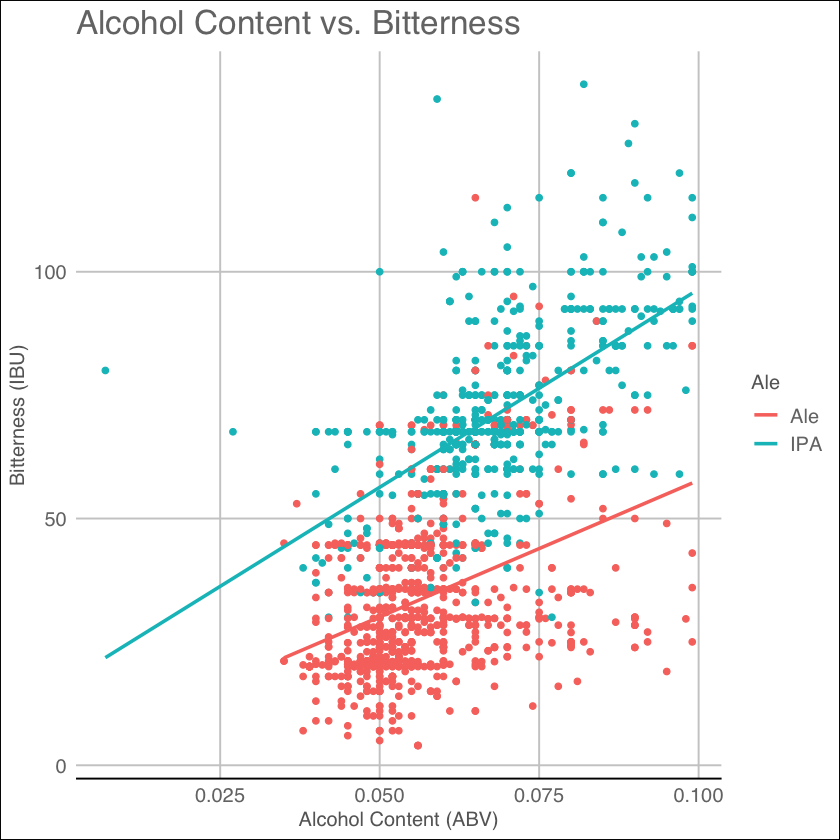

In [18]:
  ales %>%
    ggplot(aes(x = ABV, y = IBU, color = Ale)) +
    geom_point(show.legend = FALSE) +
    geom_smooth(aes(color = Ale), method = "lm", se = FALSE) +
    labs(x = "Alcohol Content (ABV)", y = "Bitterness (IBU)", title = "Alcohol Content vs. Bitterness") +
    theme_gdocs()

To further test the difference between Ales and IPA's , we can conduct a two sample t-test on the difference of their IBU and ABV values. This statistical method will test whether the difference between the means of the two groups is statistically significant, based on how their values are distributed. The following chart shows the average ABV and the 95% confidence interval for the mean value of each beer style. The confidence interval is the range of values that we can be 95% confident that the true mean lies within.  

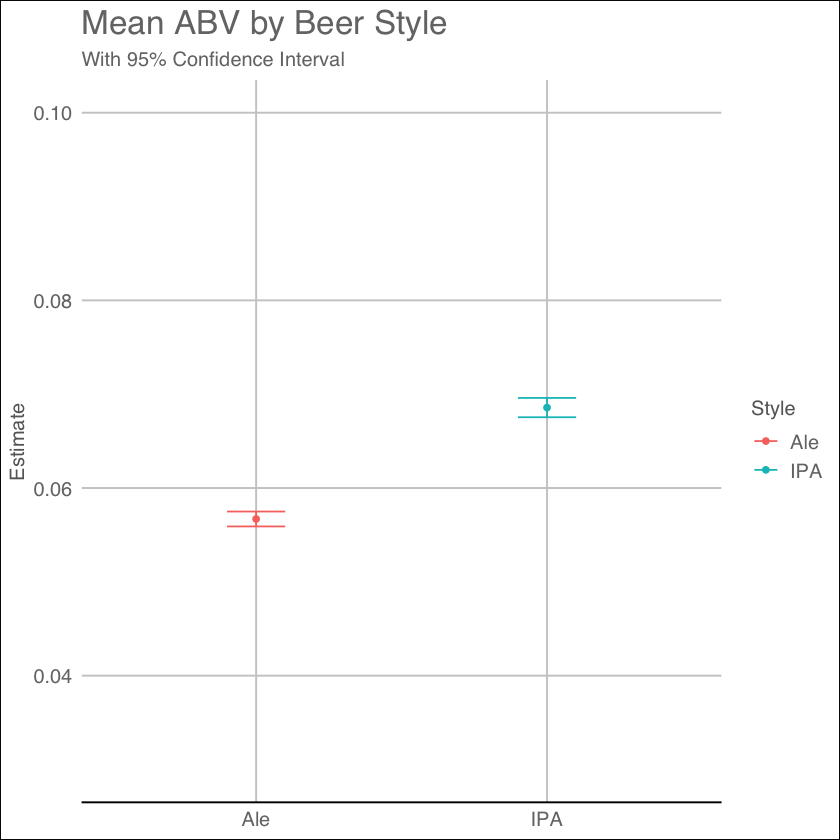

In [21]:
library(agricolae)
fit = lm(ABV ~ Ale, data = beers_breweries)
#anova(fit)

lsd_abv = LSD.test(fit, "Ale", p.adj = "none", group = FALSE)

lsd_abv$means[1:2, ] %>%
  ggplot(aes(x = rownames(.), y = ABV, color = rownames(.))) +
  geom_point() +
  geom_errorbar(aes(ymin = LCL, ymax = UCL), width = 0.2) +
  ylim(0.03, 0.1) +
  labs(
    title = "Mean ABV by Beer Style",
    subtitle = "With 95% Confidence Interval",
    x = NULL,
    y = "Estimate",
    color = "Style"
  ) +
  theme_gdocs()

We can see that the mean ABV of IPA's is significantly higher than the mean ABV of Ales. The error bars indicate that we can be 95% confident that their ranges are not even close to overlapping. In fact, the p-value that the difference in their mean ABV values is 0 is 2.2e-16, which is extremely small. This is one reason the KNN model is so effective.

Here is a chart showing the average IBU and the 95% confidence interval for each beer style:

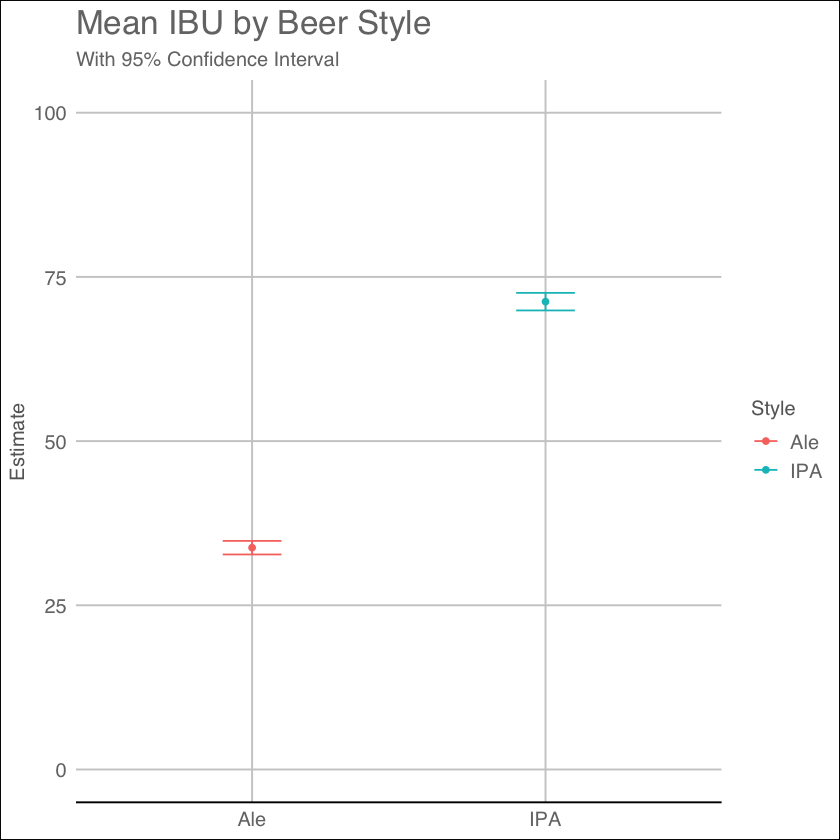

In [22]:
fit = lm(IBU ~ Ale, data = beers_breweries)
#anova(fit)

lsd_ibu = LSD.test(fit, "Ale", p.adj = "none", group = FALSE)

lsd_ibu$means[1:2, ] %>%
  ggplot(aes(x = rownames(.), y = IBU, color = rownames(.))) +
  geom_point() +
  geom_errorbar(aes(ymin = LCL, ymax = UCL), width = 0.2) +
  ylim(0, 100) +
  labs(
    title = "Mean IBU by Beer Style",
    subtitle = "With 95% Confidence Interval",
    x = NULL,
    y = "Estimate",
    color = "Style"
  ) +
  theme_gdocs()

Again, we can see that their likely ranges of mean values are not even close to overlapping. The p-value that their difference in mean IBU value is 0 is small enough to be effectively zero. This is further reason to expect the KNN model to be effective.


### 9. Broadening our analysis to include other styles of beer

Since the analysis of Ales vs IPAs, was so effective, we may as well use the same method to investigate the difference between other styles of beer. This may be useful for Budweiser to determine what specific profiles of ABV and IBU are associated with each style of beer. Such information could help with positioning their beers relative to the existing markets.

First, we will further filter data into categories of common beer styles and check what is left over:

In [23]:
# Use string methods to make an indicator of whether the beer is an IPA or an Ale (Response variable)
beers_breweries$Category <- ifelse(grepl("IPA", beers_breweries$Style, ignore.case = TRUE), "IPA",
  ifelse(grepl("Lager", beers_breweries$Style, ignore.case = TRUE), "Lager",
    ifelse(grepl("Pils", beers_breweries$Style, ignore.case = TRUE), "Pilsner",
      ifelse(grepl("Porter", beers_breweries$Style, ignore.case = TRUE), "Porter",
        ifelse(grepl("Stout", beers_breweries$Style, ignore.case = TRUE), "Stout",
          ifelse(grepl("\\bAle\\b", beers_breweries$Style, ignore.case = TRUE), "Ale", "Other")
        )
      )
    )
  )
)

beers_breweries %>%
  filter(Category == "Other") %>%
  select(Style) %>%
  unique() %>%
  print(n=100)

# A tibble: 33 × 1
# Groups:   Style [33]
   Style                              
   <chr>                              
 1 Tripel                             
 2 American Barleywine                
 3 Winter Warmer                      
 4 Fruit / Vegetable Beer             
 5 Berliner Weissbier                 
 6 Kölsch                             
 7 English Barleywine                 
 8 Altbier                            
 9 California Common / Steam Beer     
10 Gose                               
11 Witbier                            
12 Schwarzbier                        
13 Märzen / Oktoberfest               
14 Extra Special / Strong Bitter (ESB)
15 Rye Beer                           
16 Hefeweizen                         
17 Other                              
18 Radler                             
19 Bock                               
20 Bière de Garde                     
21 Doppelbock                         
22 Dunkelweizen                       
23 Dubbel             

The styles that haven't been categorized are either too specific or too obscure to be useful. We will leave them as "Other".

Here is a chart showing the distribution of common beer categories we've identified:

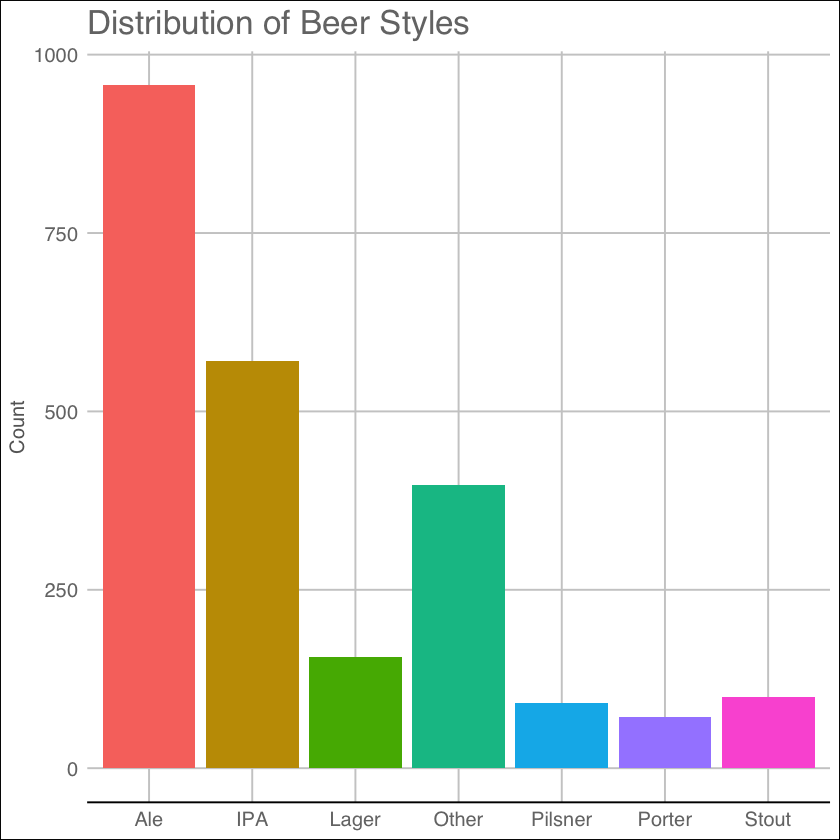

In [24]:
# Visualize the distribution of beer styles
beers_breweries %>%
  ggplot(aes(x = Category, fill = Category)) +
  geom_bar(show.legend = FALSE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribution of Beer Styles", x = NULL, y = "Count") +
  theme_gdocs()

Next, we will use the same statistical methods as above to investigate the ABV and IBU values of each category of beer. This chart shows the distributions of ABV for each category of beer:

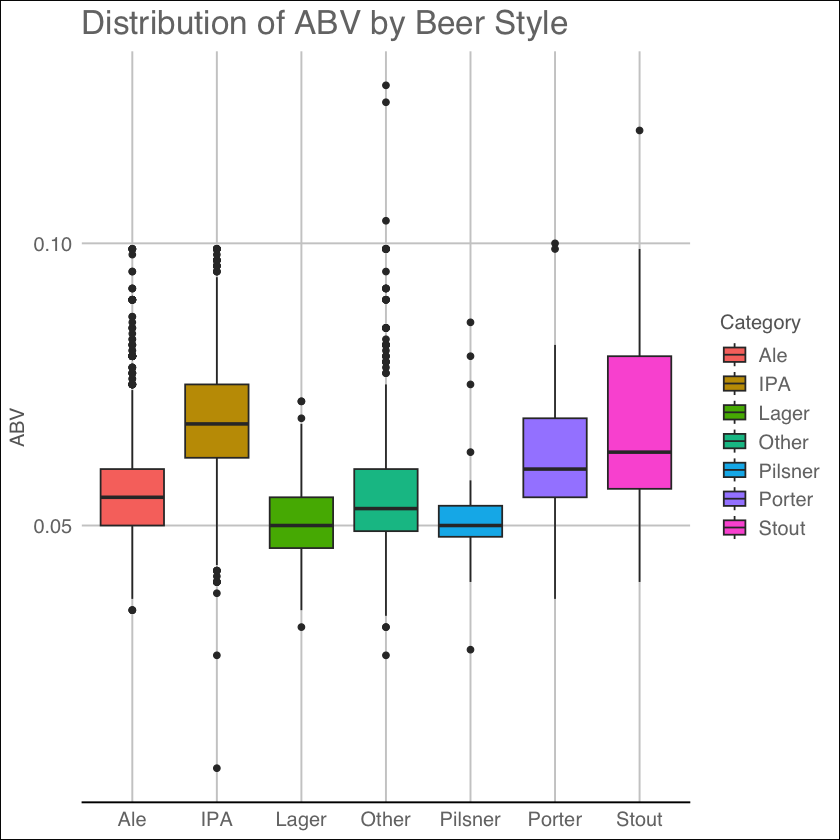

In [25]:
# Plot a boxplot of ABV by beer style
beers_breweries %>%
  ggplot(aes(x = Category, y = ABV, fill = Category)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribution of ABV by Beer Style", x = NULL, y = "ABV") +
  theme_gdocs()

They appear to fall into distinct ranges, but we can use the t.test to determine if they are significantly different from each other.

The following chart shows the mean value of each category of beer and the 95% confidence interval for their mean values obtained from pairwise t-tests:

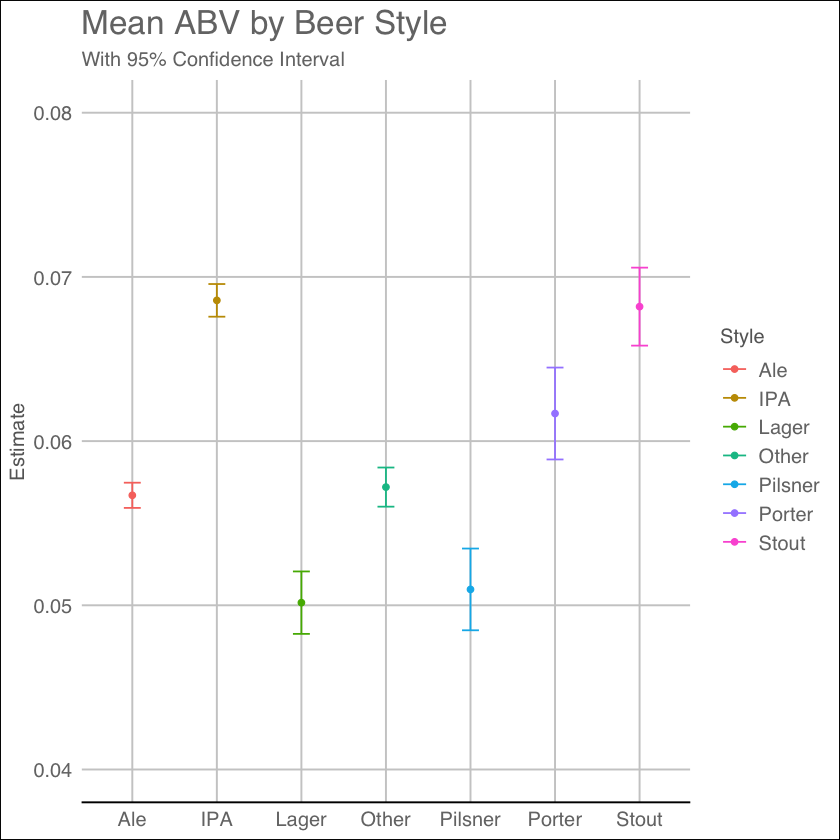

In [26]:
fit = lm(ABV ~ Category, data = beers_breweries)
#anova(fit)

lsd_abv = LSD.test(fit, "Category", p.adj = "bonferroni", group = FALSE)

lsd_abv$means %>%
  ggplot(aes(x = rownames(.), y = ABV, color = rownames(.))) +
  geom_point() +
  geom_errorbar(aes(ymin = LCL, ymax = UCL), width = 0.2) +
  ylim(0.04, 0.08) +
  labs(
    title = "Mean ABV by Beer Style",
    subtitle = "With 95% Confidence Interval",
    x = NULL,
    y = "Estimate",
    color = "Style"
  ) +
  theme_gdocs()

We can see that, while some categories have overlapping confidence intervals, most are different. The only categories that do not have a significant difference in their mean ABV values (p > 0.05 including Bonferroni adjustment for post-hoc comparisons) are Ale and Other, IPA and Stout, Lager and Pilsner, and Other and Porter.

Here is the distribution by category for the IBUs:

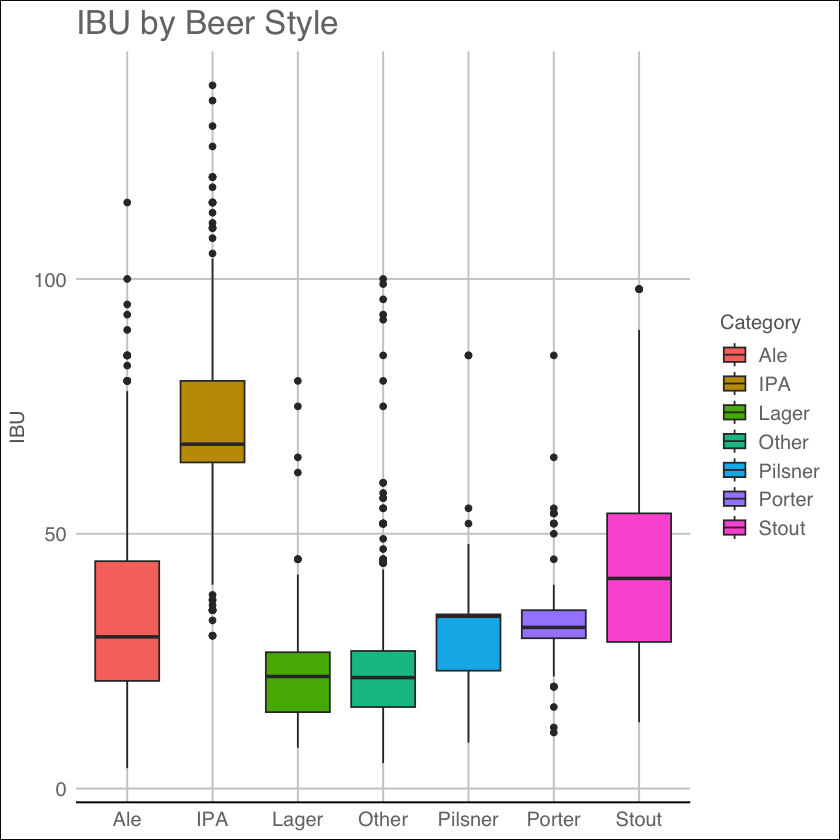

In [27]:
# Plot a boxplot of ibu by beer style
beers_breweries %>%
  ggplot(aes(x = Category, y = IBU, fill = Category)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "IBU by Beer Style", x = NULL, y = "IBU") +
  theme_gdocs()

Again, we can see that they fall into distinct ranges, but we can use the t.test to determine if they are significantly different from each other:

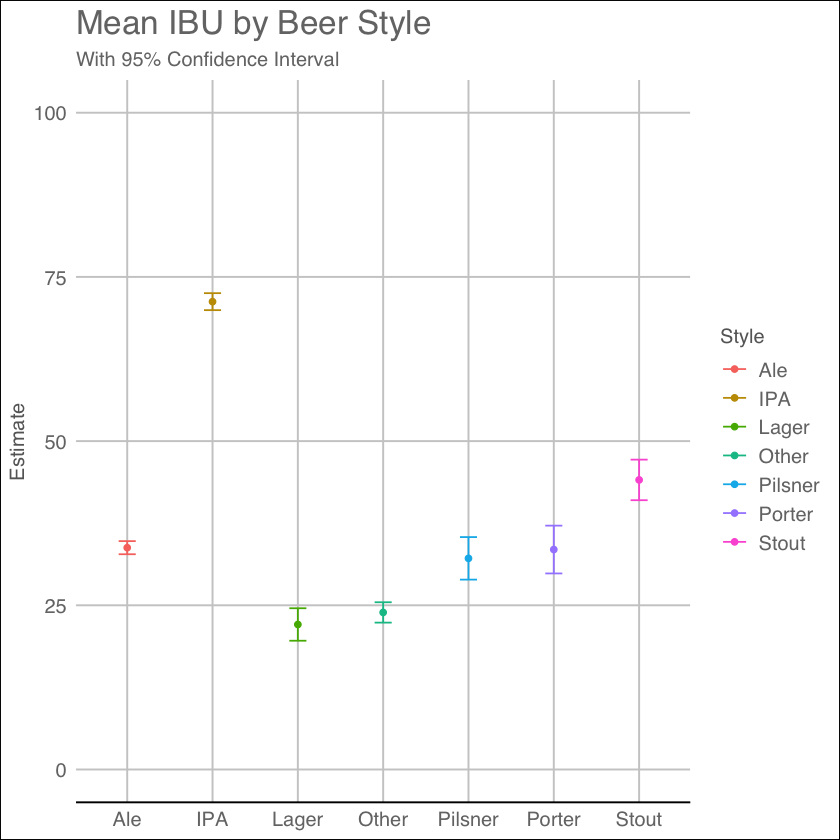

In [28]:
fit = lm(IBU ~ Category, data = beers_breweries)
#anova(fit)

lsd_ibu = LSD.test(fit, "Category", p.adj = "bonferroni", group = FALSE)

lsd_ibu$means %>%
  ggplot(aes(x = rownames(.), y = IBU, color = rownames(.))) +
  geom_point() +
  geom_errorbar(aes(ymin = LCL, ymax = UCL), width = 0.2) +
  ylim(0, 100) +
  labs(
    title = "Mean IBU by Beer Style",
    subtitle = "With 95% Confidence Interval",
    x = NULL,
    y = "Estimate",
    color = "Style"
  ) +
  theme_gdocs()

Here, there is some overlap, but also significant differences. The only pairings that do not have statistically significant differences of means are: Ales, Porters, and Pilsners, as well as the difference between Lager and Other. 

### 10. Building a KNN model to predict beer style

Because the categories have distinct ranges for ABV and IBU, we can expect that a KNN model built on these categories will be effective, if less so than the one that categorizes Ales and IPAs. As a reminder, KNN classifies beers based on the closest beers to a given ABV and IBU value based on the beers dataset. Here are the results of the KNN model classifying based on the seven categories we've identified:

In [29]:
set.seed(137)
# Use KNN to classify the beers into broad categories using ABV and IBU as the predictors
# The entire dataset is used to train the model, including "Other" beers
classifications = knn.cv(na.omit(beers_breweries)[, c("ABV", "IBU")], na.omit(beers_breweries)$Category, k = 5)
confusionMatrix(table(classifications, na.omit(beers_breweries)$Category))

Confusion Matrix and Statistics

               
classifications Ale IPA Lager Other Pilsner Porter Stout
        Ale     761  63    41   133      38     34    32
        IPA      62 494     5    20       3      3    17
        Lager    27   0    83    23       2      0     3
        Other    85   7    26   217       6      7     4
        Pilsner   4   0     0     1      41      0     0
        Porter    9   0     1     1       1     27     1
        Stout     9   6     0     2       0      1    43

Overall Statistics
                                          
               Accuracy : 0.7111          
                 95% CI : (0.6922, 0.7293)
    No Information Rate : 0.4085          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.595           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Ale Class: IPA Class: Lager Class: Ot

The model does pretty well. Overall accuracy is 0.71, meaning that it correctly classifies 71% beers. Considering that there are 7 categories, this is a very usable result. The model also remains very accurate (~84% balanced accuracy) at classifying Ales and IPAs, which is the most important category for Budweiser. The authors expect this ability to either classify or reject a beer as an IPA or an Ale (or any other style) to be very useful for Budweiser when evaluating new products.

Finally, we can compare the results from our analysis of the American Beer market with some of Budweiser's top offerings. The following chart shows the ABV and IBU values by style, as well as the Budweiser's top offerings as the blue triangles:

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


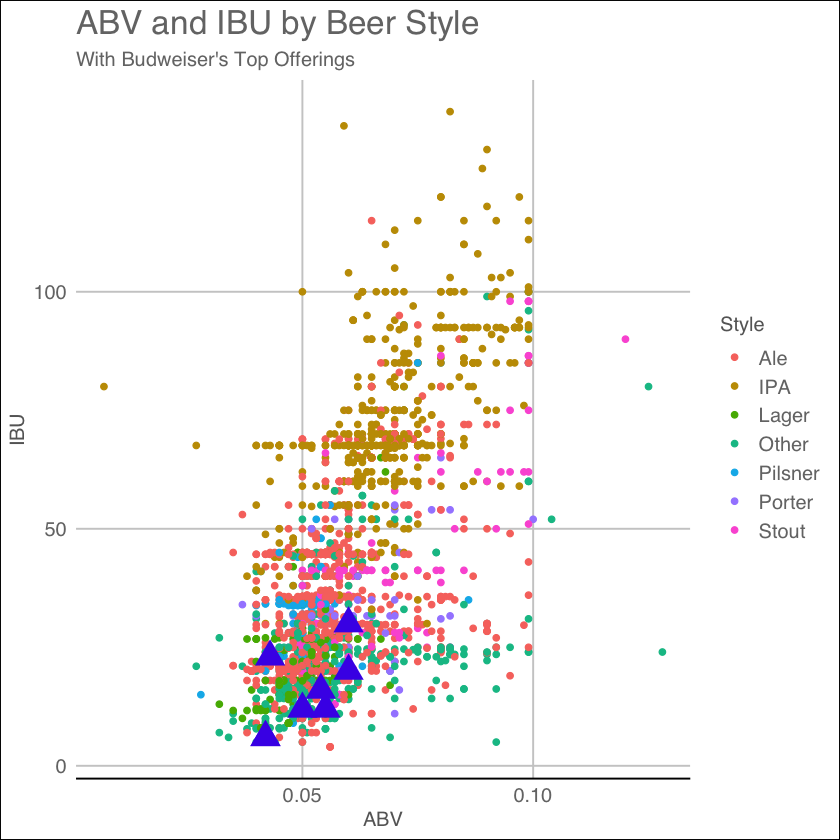

In [30]:
# Plot the ABV and IBU values for each beer style, as well as Budweiser's top offerings
budweiser_top <- data.frame(
  Beer_Name = c("Budweiser Lager",
    "Bud Light Lager",
    "Budweiser Select Lager",
    "Budweiser Black Crown Lager",
    "Budweiser Copper Lager",
    "Budweiser Freedom Reserve Red Lager",
    "Budweiser Chelada", 
    "Bud Ice Lager",
    "Bud Light Lime Lager",
    "Bud Light Platinum Lager"),
  ABV = c(.05, .042, .043, .060, .062, .054, .042, .055, .042, .060),
  IBU = c(12, 6, 23, 30, NA, 16, NA, 12, 6, 20),
  Category = c("Budweiser Top 10")
)

beers_breweries %>%
  ggplot(aes(x = ABV, y = IBU, color = Category)) +
  geom_point() +
  geom_point(data = budweiser_top, aes(x = ABV, y = IBU), color = "#4a06e9", size = 6, shape = 17) +
  labs(
    title = "ABV and IBU by Beer Style",
    subtitle = "With Budweiser's Top Offerings",
    x = "ABV",
    y = "IBU",
    color = "Style"
  ) +
  theme_gdocs()

Budweiser's top offerings are all Lagers, which isn't surprising, as Budweiser is the largest producer of Lagers in the United States. However, it is interesting to note that Budweiser's top offerings are all in the lower range of ABV and IBU for the market, and that the market for Lagers is not as broad as the market for Ales and IPAs. This may be useful information for Budweiser as they develop new products.

## Conclusion

The American domestic beer market has a broad and diverse variety of beer styles available. In our analysis, we have learned common profiles of alcohol content (ABV) and bitterness (IBU) for each style of beer, as well as for each category. We have also learned that a KNN model can be used to accurately classify a beer into the proper category based on its ABV and IBU values, and perhaps more usefully, determine whether a beer fits into the market norms for its style. Lastly, we have seen how Budweiser's offerings of Lagers relates to the broader market, and hopefully that information can be used to inform future product development.

This analysis has answered the initial questions posed by Budweiser's request, and has perhaps raised even more. The authors hope that this analysis will be useful to Budweiser in their future product development. Any questions about this analysis or proposals for additional research can be directed to the authors at:

Nicholas Sager: nsager@smu.edu  
Steven Cox: sacox@mail.smu.edu

In [31]:
# Write beers_breweries to a csv for later use
write_csv(beers_breweries, "Data/beers_breweries.csv")